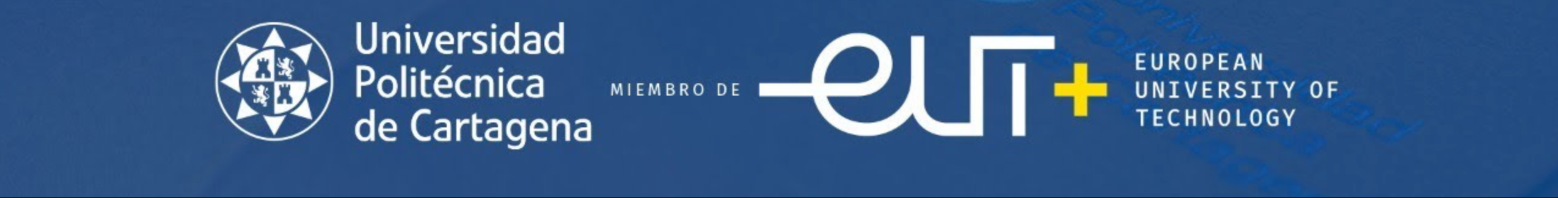

**MACHINE LEARNING II**

# PRÁCTICA 3: SESIÓN 1 - FUNCIONES DE PERTENENCIA Y CONJUNTOS DIFUSOS


Los objetivos de aprendizaje de esta práctica son:
1) Comprender y aplicar conceptos de la teoría de conjuntos difusos y las funciones de pertenencia.
2) Aprender a crear y manipular conjuntos difusos y con distintas funciones de pertenencia para modelar incertidumbre y vaguedad de los datos.
3) Comprender el efecto de modificadores lingüísticos en los conjuntos difusos.
4) Aplicar estos conocimientos a problemas prácticos.

## 1. Recordatorio de teoría

### 1.1 Definición de un conjunto difuso

Recuerde qué era un conjunto difuso...

- Un conjunto clásico, es aquel donde los elementos se dividen de una forma muy clara y concreta, sabiendo con completa certeza a qué grupo pertenece cada elemento. Por ejemplo: si nos dan un número, podremos clasificarlo de forma directa en par o impar, sin dejar lugar a duda.

- Por otro lado, los conjuntos difusos, son aquellos donde no existe un criterio tan definido. En el ejemplo, "ser una persona alta" no existe un criterio exacto que delimite la pertencia o no a ese grupo.

Dado un universo de discurso $U$ (por ejemplo, las diferentes alturas posibles en cm), definimos un conjunto borroso como una función en [0,1] quer representa el grado en que un elemento pertence a un ese conjunto:

$\mu_F : U \rightarrow [0,1]$



Una posible definición de los conceptos "Bajo" y "Mediano" y "Alto" sería la siguiente:
En la tabla mostrada a continuación, se puede observar como, aunque por convenio se han establecido algunos valores que acercan más a un grupo o a otro, no existe un límite claro que los separe, esto mismo se ve en dos medidas:


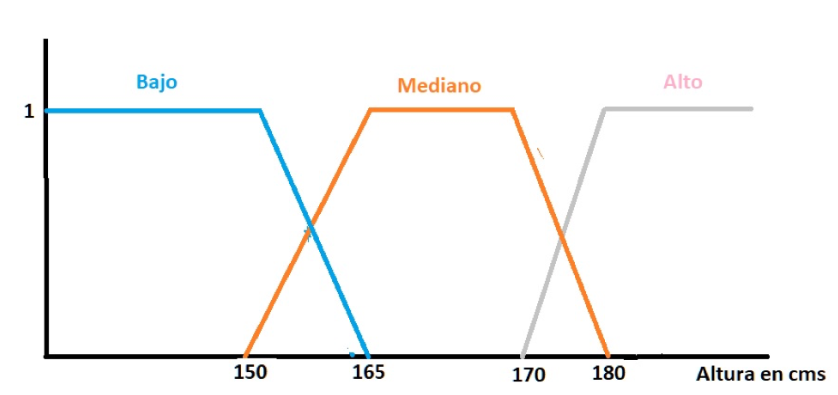

Dadas esta definiciones, se considera que:
- Si se encuentra en 190cm está claro que usted es alto: pertenencia a alto = 1, pertenencia al resto = 0
- Si se encuentra en 175cm, no está tan claro: pertenencia a mediano = 0.5, pertenencia a alto = 0.5

### 1.2 Operaciones con conjuntos difusos

Es posible realizar operaciones entre distintos conjuntos. Como vimos en teoría, las funciones más comunes son las de:
  - Unión: $\mu_{A\cup B}=max\{\mu_A(u), \mu_B(u)\}$
  - Intersección: $\mu_{A\cap B}=min\{\mu_A(u), \mu_B(u)\}$
  - Complemento: $\mu_{\bar{A}}=1-\mu_A(u)$

### 1.3 (**NUEVO**) Modificadores lingüísticos

Aunque se explicará con más detenimiento en teoría, se pueden definir operaciones sobre funciones de pertenencia para modelar modificadores lingüisticos como "muy" o "más o menos". Por ejemplo, podemos definir los siguientes modificadores:

- MUY: $\mu_{MUY A}(u) = \mu_{A}(u)^2$
- MÁS O MENOS: $\mu_{MAS\_O\_MENOS\_A}(u) = \mu_{A}(u)^{1/2}$

En la práctica "MUY" hará que las funciones se contraigan, mientras que "MAS O MENOS" hará que se dilaten. Veremos más claramente el efecto en los ejercicios de hoy.

## 2. Librería `skfuzzy`

Utilizaremos la librería `skfuzzy` (https://pythonhosted.org/scikit-fuzzy/user_guide.html) para definir las funciones de pertenencia de nuestros conjuntos difusos. También utilizaremos la librería `numpy` para realizar las operaciones sobre ellos. Para instalarlas y/o importarlas, ejecute el siguiente código:

In [1]:
# Código para instalar las librerías en caso de no tenerlas ya
%pip install numpy
%pip install -U scikit-fuzzy
%pip install matplotlib

#Implemente las librerías mencionadas
import numpy as np
import skfuzzy as fuzz

import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.1 MB/s  0:00:00
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### 2.1 Definición de conjuntos difusos

Para trabajar con conjuntos difusos utilizaremos directamente las funciones de pertenencia que los definen. La sintaxis de estas funciones en la librería `skfuzzy` sigue dos patrones distintos, dependiendo de la función que se utilice. Por ejemplo, si usamos una función de pertenencia trapezoidal utilizaremos la función `trapmf`:

`fuzz.trapmf(x, abcd)`, donde:
-  `x` son los valores del universo $U$ sobre los que definimos nuestro conjunto difuso y sobre los que vamos a calcular la función de pertenencia.
- `abcd` debe ser un array con cuatro elementos, definiendo los cuatro puntos del trapecio, con a $\leq$ b $\leq$ c $\leq$ d.

El segundo parámetro puede variar según la función. A continuación se muestra el código para distintas funciones vistas en teoría:

In [54]:
# Definición el rango de valores para la temperatura (0°C a 100°C)
temperatura = np.arange(0, 101, 1)

# Funciones de pertenencia

# Función triangular. Parámetros: Array con los 3 puntos del triángulo
y_triangular = fuzz.trimf(temperatura, [20,50,80])

# Función trapezoidal. Parámetros: Array con los 4 puntos del triángulo
y_trapezoidal= fuzz.trapmf(temperatura,[20,40,60,80])

# Función S. Parámetros: Array con el inicio y el fin de la forma de la función
y_funcionS   = fuzz.smf(temperatura,20,50)

# Función Z. Parámetros: Array con el inicio y el fin de la forma de la función
y_funcionZ   = fuzz.zmf(temperatura,20,50)

# Función gaussiana. Parámetros: media y desviación típica
y_gaussiana  = fuzz.gaussmf(temperatura,50,10)

# Función Pi (mezcla de S y Z). Parámetros: puntos donde comienza a subir, alcanza el máximo, comienza a descender, y alcanza el mínimo.
y_funcionPi  = fuzz.pimf(temperatura,20,40,60,80)

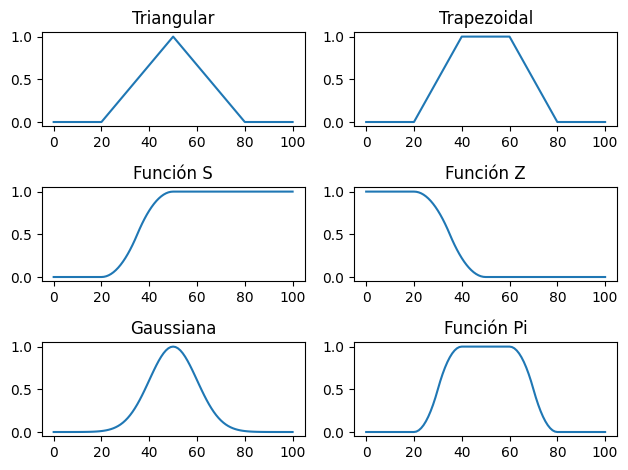

In [20]:
# Representamos las distintas funciones
titulos  = ['Triangular','Trapezoidal','Función S','Función Z','Gaussiana','Función Pi']
imagenes = [y_triangular,y_trapezoidal,y_funcionS,y_funcionZ,y_gaussiana,y_funcionPi]

fig, ejes = plt.subplots(nrows=3,ncols=2)

for titulo,imagen,eje in zip(titulos,imagenes,ejes.flatten()):
  eje.plot(temperatura,imagen)
  eje.set_title(titulo)

plt.tight_layout()

NOTA: La librería no tiene métodos para operar con las funciones de pertenencia generadas (unión, intersección, modificadores lingüísticos, etc.). En su lugar, utilizaremos las funciones matemáticas directamente sobre los arrays con los grados de pertencia de cada función, según como se haya definido cada una de ellas.

### 2.2 Ejemplo - Definición de conjuntos de temperatura

Empezaremos definiendo unos conjuntos borrosos sencillos. Utilizaremos la función `trapmf`, que permite generar conjuntos trapezoidales sobre un rango de valores dados los cuatro puntos necesarios (a, b, c, d), vomo se vió anteriormente.

Definiremos varios conjuntos difusos de temperatura en el rango de 0ºC a 100ºC, para ello, utilizaremos una función de pertenencia trapezoidal. Los conjuntos a definir serían:

  - _Temperatura baja_: de 0ºC a 10ºC, alcanzando su máxima pertenencia desde 0ºC y su mínima en 10ºC.
  - _Temperatura media_: entre 0º y 60º, alcanzando su máxima pertenencia desde los 20ºC a 40ºC.
  - _Temperatura alta_: comienza la pertenencia en 50ºC, alcanzando su máxima pertenencia en 70ºC.

In [21]:
# Defina el rango de valores para la temperatura (0°C a 100°C)
temperatura = np.arange(0, 101, 1)

# Defina las funciones de pertenencia trapezoidales
temperatura_baja = fuzz.trapmf(temperatura, [0, 0, 0, 10])

**A completar por el alumno:** Defina el resto de funciones de pertenencia usando las variables `temperatura_media` y `temperatura_alta`

In [22]:
temperatura_media = fuzz.trapmf(temperatura, [0, 20, 40, 60])
temperatura_alta = fuzz.trapmf(temperatura, [50, 70, 100, 100])

Podemos visualizar las funciones de pertenencia de la siguiente manera:

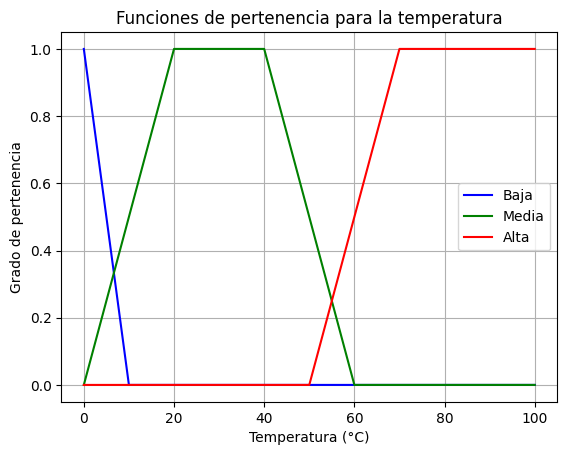

In [23]:
# Visualizar las funciones de pertenencia
plt.figure()
plt.plot(temperatura, temperatura_baja, 'b', label='Baja')
plt.plot(temperatura, temperatura_media, 'g', label='Media')
plt.plot(temperatura, temperatura_alta, 'r', label='Alta')
plt.title('Funciones de pertenencia para la temperatura')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Grado de pertenencia')
plt.legend()
plt.grid(True)
plt.show()

### 2.3 Ejemplo - Operaciones con conjuntos difusos


Como se ha comentado antes, las operaciones sobre conjutos se hacen utilizando directamente los valores de sus funciones de pertenencia. Por ejemplo, para calcular cuál sería la función de pertenencia resultante de la __unión__ de `temperatura_media` y `temperatura_alta` podemos utilizar directamente la función `fmax`de `numpy`, que de vuelve los máximos de dos arrays comparados elemento a elemento:

In [24]:
union_temp_media_alta = np.fmax(temperatura_media, temperatura_alta)

**A completar por el/la alumno/a:** Defina las siguientes funciones de pertenencia:

- `interseccion_temp_media_alta` = Intersección de `temperatura_media` y `temperatura_alta` (pista: usar `np.fmin`).
- `complemento_temp_alta` = Complemento de `temperatura_alta` en la variable.

In [25]:
interseccion_temp_media_alta = np.fmin(temperatura_media, temperatura_alta)
complemento_temp_alta        = 1 - temperatura_alta

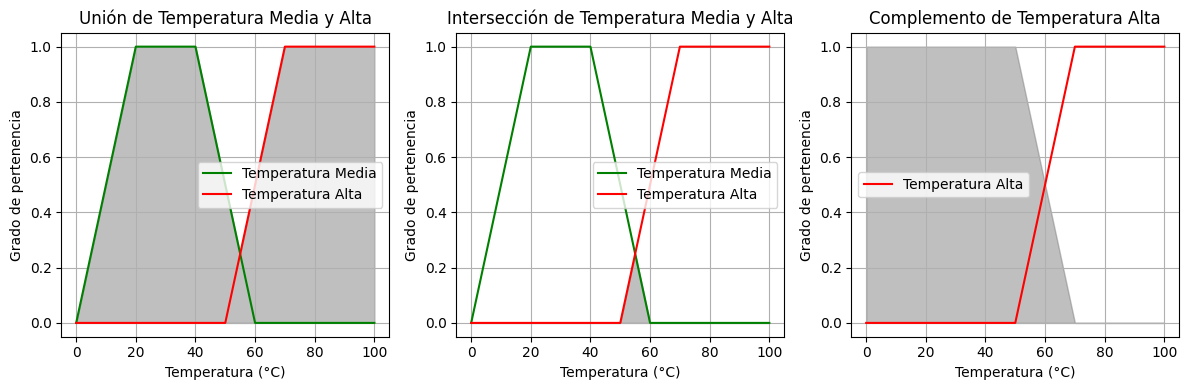

In [26]:
# Visualizar las operaciones
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(temperatura, temperatura_media, 'g', label='Temperatura Media')
plt.plot(temperatura, temperatura_alta, 'r', label='Temperatura Alta')
plt.fill_between(temperatura, union_temp_media_alta, color='gray', alpha=0.5)
plt.title('Unión de Temperatura Media y Alta')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Grado de pertenencia')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(temperatura, temperatura_media, 'g', label='Temperatura Media')
plt.plot(temperatura, temperatura_alta, 'r', label='Temperatura Alta')
plt.fill_between(temperatura, interseccion_temp_media_alta, color='gray', alpha=0.5)
plt.title('Intersección de Temperatura Media y Alta')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Grado de pertenencia')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(temperatura, temperatura_alta, 'r', label='Temperatura Alta')
plt.fill_between(temperatura, complemento_temp_alta, color='gray', alpha=0.5)
plt.title('Complemento de Temperatura Alta')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Grado de pertenencia')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Recordemos también que hay ciertas propiedades de los conjuntos tradicionales que no se cumplen en los fuzzy, por ejemplo que la insersección entre un conjunto y su complemento no tienen por qué ser vacía:

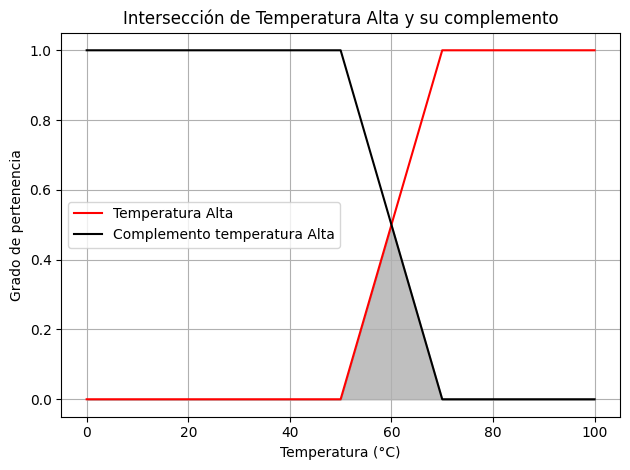

In [27]:
interseccion_temp_alta_no_alta = np.fmin(temperatura_alta, complemento_temp_alta)

plt.plot(temperatura, temperatura_alta, 'r', label='Temperatura Alta')
plt.plot(temperatura, complemento_temp_alta, 'black', label='Complemento temperatura Alta')
plt.fill_between(temperatura, interseccion_temp_alta_no_alta, color='gray', alpha=0.5)
plt.title('Intersección de Temperatura Alta y su complemento')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Grado de pertenencia')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### 2.4 Ejemplo - Modificadores lingüísticos

Para los modificadores lingüísticos procederemos como con las operaciones entre conjuntos, es decir, operando directamente sobre los arrays que definen la pertenencia al conjunto.

Por ejemplo, la pertenencia al conjunto "temperatura **muy** baja", siguiendo la definición del modificador visto en 1.3, sería:

In [28]:
temperatura_muy_baja = np.power(temperatura_baja,2)

**A completar por el/la alumno/a:** Genere en la variable `temperatura_mas_o_menos_media` la función de pertenencia del conjunto "temperatura **más o menos** media". (Pista: Función raíz cuadrada: np.sqrt())

In [29]:
temperatura_mas_o_menos_media = np.sqrt(temperatura_media)

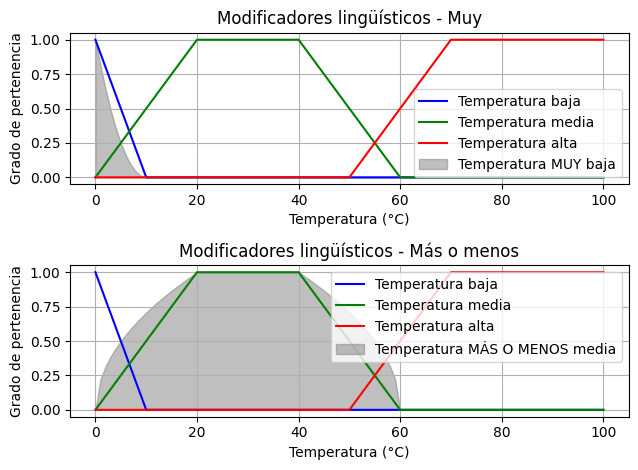

In [30]:
# Visualicemos los conjuntos con modificadores lingüisticos
plt.subplot(2, 1, 1)
plt.plot(temperatura, temperatura_baja, 'b', label='Temperatura baja')
plt.plot(temperatura, temperatura_media, 'g', label='Temperatura media')
plt.plot(temperatura, temperatura_alta, 'r', label='Temperatura alta')
plt.fill_between(temperatura, temperatura_muy_baja, color='gray', alpha=0.5, label="Temperatura MUY baja")
plt.title('Modificadores lingüísticos - Muy')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Grado de pertenencia')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(temperatura, temperatura_baja, 'b', label='Temperatura baja')
plt.plot(temperatura, temperatura_media, 'g', label='Temperatura media')
plt.plot(temperatura, temperatura_alta, 'r', label='Temperatura alta')
plt.fill_between(temperatura, temperatura_mas_o_menos_media, color='gray', alpha=0.5, label="Temperatura MÁS O MENOS media")
plt.title('Modificadores lingüísticos - Más o menos')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Grado de pertenencia')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## 3. Ejercicios

### 3.1 Conjuntos de humedad básicos

La humedad relativa indica el porcentaje de vapor de agua presente en el aire, variando del 0% al 100%. Defina tres conjuntos difusos para humedad relativa de forma similar a lo hecho en temperatura (i. e. humdedad alta, media y baja) y dibuje un gráfico con dichos conjuntos. Tenga en cuenta que se suele considerar como `alta` una humedad superior al 70%, y como `baja` una humdedad del 30%. Utilice funciones de pertenencia **distintas** de la trapezoidal.

**SOLUCIÓN**

In [68]:
# Defina el rango de valores para la humedad (0% a 100%)
humedad = np.arange(0, 101, 1)

# Defina las funciones de pertenencia 
humedad_baja  = fuzz.pimf(humedad, 0, 0, 30, 50)
humedad_media = fuzz.pimf(humedad, 20, 40, 60, 80)
humedad_alta  = fuzz.pimf(humedad, 50, 70, 100, 101)

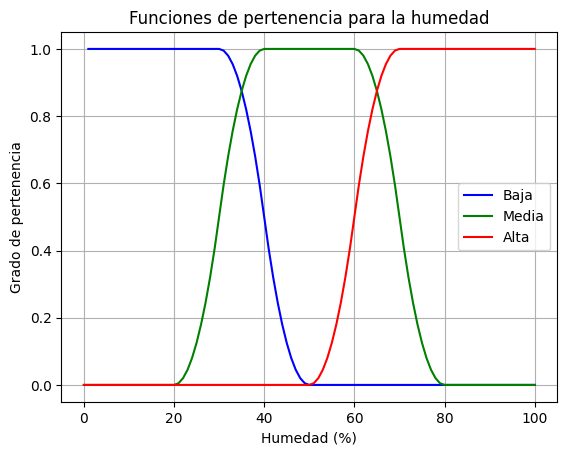

In [69]:
# Visualizar las funciones de pertenencia
plt.figure()
plt.plot(humedad, humedad_baja, 'b', label='Baja')
plt.plot(humedad, humedad_media, 'g', label='Media')
plt.plot(humedad, humedad_alta, 'r', label='Alta')
plt.title('Funciones de pertenencia para la humedad')
plt.xlabel('Humedad (%)')
plt.ylabel('Grado de pertenencia')
plt.legend()
plt.grid(True)
plt.show()

### 3.2 Operaciones con los conjuntos de humedad

Con los conjutos de humedad anteriormente definidos, calcule la función de pertenencia para el conjunto **humedad ni alta ni baja**. Muestre la función de pertenencia en el mismo gráfico que el resto de conjuntos de pertenencia.

**SOLUCIÓN**

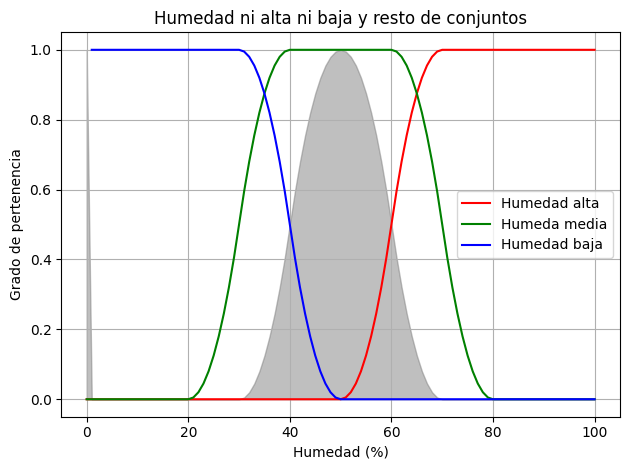

In [73]:
# Complete la definición del conjunto
humedad_ni_alta_ni_baja = np.fmin(1 - humedad_alta, 1 - humedad_baja)


plt.figure()
plt.plot(humedad, humedad_alta, 'r', label='Humedad alta')
plt.plot(humedad, humedad_media, 'g', label='Humeda media')
plt.plot(humedad, humedad_baja, 'b', label='Humedad baja')
plt.fill_between(humedad, humedad_ni_alta_ni_baja, color='gray', alpha=0.5)
plt.title('Humedad ni alta ni baja y resto de conjuntos')
plt.xlabel('Humedad (%)')
plt.ylabel('Grado de pertenencia')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### 3.3 Temperatura humana

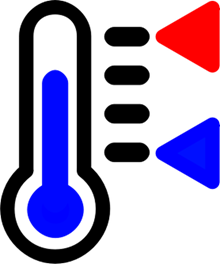

Fuente: publicdomainvectors.org

Se considera que la temperatura corporal está por debajo de lo normal (hipotermia) a partir de los 35 grados centígrados, considerándose ya como una emergencia médica por debajo de los 32 grados. Por otro lado, se considera que la temperatura es demasiado elevada (hipertermia) a partir de los 37,5 grados, considerándose una emergencia cuando esta llega a los 41 grados. Cree un conjunto difuso para que modele el nivel de emergencia que presenta un paciente en función de su temperatura corporal. Represente posteriormente todos los conjuntos utilizados junto con el de grado de emergencia.

**SOLUCIÓN**

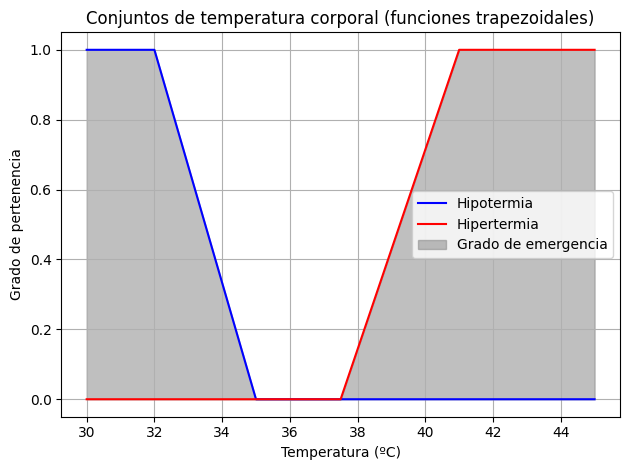

In [78]:
# En primer lugar definimos el rango de temperaturas sobre el que vamos a definir los conjuntos
# Podríamos usar el que ya está definido de 0 a 100, pero parece más correcto hacer uno "adaptado" al problema, 
# por ejemplo entre 30 y 45 grados, y con una granularidad mayor (eg. 0,5 grados)
temperatura_corporal = np.arange(30, 45.5, 0.5)

# Defina los conjuntos de hipotermia e hipertermia con funciones trapezoidales o S/Z, como desee
hipotermia   = fuzz.trapmf(temperatura_corporal, [30, 30, 32, 35])
hipertermia  = fuzz.trapmf(temperatura_corporal, [37.5, 41, 45, 45])


# A continuación, defina el conjunto grado de emergencia
grado_de_emergencia = np.fmax(hipotermia, hipertermia)

# Representación
plt.figure()
plt.plot(temperatura_corporal, hipotermia, 'b', label='Hipotermia')
plt.plot(temperatura_corporal, hipertermia, 'r', label='Hipertermia')
plt.fill_between(temperatura_corporal, grado_de_emergencia, color='gray', alpha=0.5, label="Grado de emergencia")
plt.title('Conjuntos de temperatura corporal (funciones trapezoidales)')
plt.xlabel('Temperatura (ºC)')
plt.ylabel('Grado de pertenencia')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### 3.4 La paella

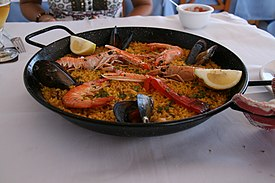


<sub>Fuente: Wikipedia</sub>

Vamos a cocinar una paella para toda la familia. Para intentar acertar con el punto del arroz, vamos preguntando y obtenemos las siguientes respuestas:

- Abuela: "Cuanto más blandito mejor, que así lo puedo masticar".
- Cuñado: "Aquí no sabéis comer arroz. No puede estar ni blando ni duro.".
- Sobrina: "Yo lo quiero _crunchy_. O casí puré, que he visto a uno en Tik Tok que se lo come así y da mucha risa."

En tu experiencia culinaria has calculado que si retiras la paella a los 15 minutos el arroz sale duro, mientras que si la dejas hasta los 25 minutos el arroz se pasa por completo. Diseña un conjunto difuso que indique el grado de aceptación que tendrá tu paella en general según el tiempo de cocción.




**SOLUCIÓN**

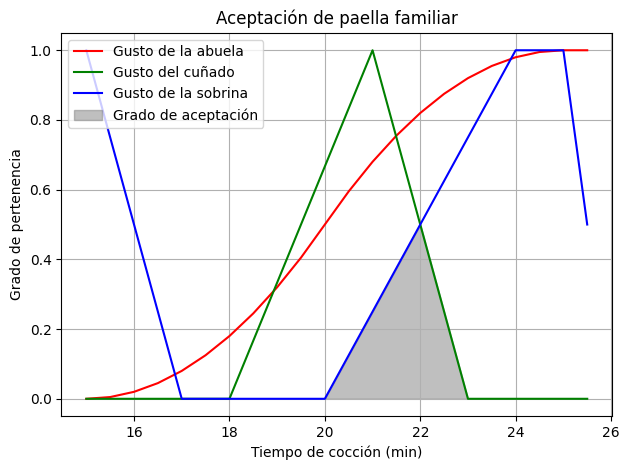

In [100]:
# Definición del rango del dominio
tiempo_coccion = np.arange(15, 26, 0.5)

# Defina los conjuntos para cada miembro de la familia
abuela =  fuzz.smf(tiempo_coccion, 15, 25)
cunyado = fuzz.trimf(tiempo_coccion, [18, 21, 23])
sobrina = np.maximum(
    fuzz.trapmf(tiempo_coccion, [5, 10, 15, 17]),
    fuzz.trapmf(tiempo_coccion, [20, 24, 25, 26])
)

# Defina el conjunto final de grado de aceptación
grado_aceptacion = np.fmin(np.fmin(abuela, cunyado), sobrina)

# Representación
plt.figure()
plt.plot(tiempo_coccion, abuela, 'r', label='Gusto de la abuela')
plt.plot(tiempo_coccion, cunyado, 'g', label='Gusto del cuñado')
plt.plot(tiempo_coccion, sobrina, 'b', label='Gusto de la sobrina')
plt.fill_between(tiempo_coccion, grado_aceptacion, color='gray', alpha=0.5, label="Grado de aceptación")
plt.title('Aceptación de paella familiar')
plt.xlabel('Tiempo de cocción (min)')
plt.ylabel('Grado de pertenencia')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
